In [ ]:
# %conda install -c pytorch pytorch torchvision
# !pip install torch==1.7.1

In [3]:
pip install torch

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import torch                                        # root package
from torch.utils.data import Dataset, DataLoader    # dataset representation and loading
import torch.autograd as autograd                   # computation graph
from torch import Tensor                            # tensor node in the computation graph
import torch.nn as nn                               # neural networks
import torch.nn.functional as F                     # layers, activations and more
import torch.optim as optim                         # optimizers e.g. gradient descent, ADAM, etc.
from torch.jit import script, trace                 # hybrid frontend decorator and tracing jit

## Complete Neural Net from scratch

X: (303, 13), y: (303,)


array([[23,  7],
       [ 7, 24]], dtype=int64)

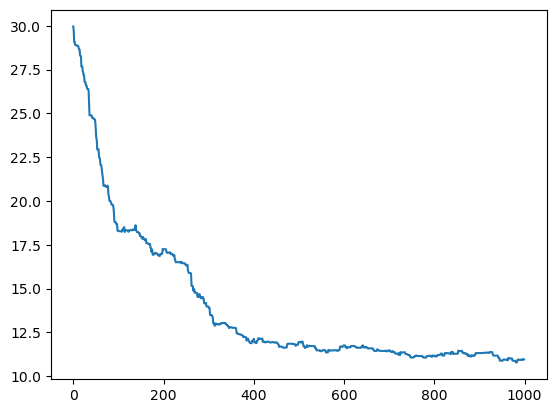

In [3]:

#%% packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#%% data prep
# source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
df = pd.read_csv('heart.csv')
df.head()

#%% separate independent / dependent features
X = np.array(df.loc[ :, df.columns != 'output'])
y = np.array(df['output'])

print(f"X: {X.shape}, y: {y.shape}")

#%% Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#%% scale the data
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

#%% network class
class NeuralNetworkFromScratch:
    def __init__(self, LR, X_train, y_train, X_test, y_test):
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.L_train = []
        self.L_test = []
        
    def activation(self,x):
        # sigmoid in our case
        return 1/(1 + np.exp(-x))
    
    def dactivation(self, x):
        # derivative of sigmoid
        return self.activation(x) * (1 - self.activation(x))
    
    def forward(self, X):
        hidden_1 = np.dot(X, self.w) + self.b
        activate_1 = self.activation(hidden_1)
        return activate_1
    
    def backward(self, X, y_true):
        #calc gradients
        hidden_1 = np.dot(X, self.w) + self.b
        y_pred = self.forward(X)
        dL_dpred = 2 * (y_pred - y_true)
        dpred_dhidden1 = self.dactivation(hidden_1)
        dhidden1_db = 1
        dhidden1_dw = X
       
        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw
        return dL_db, dL_dw
        
    def optimizer(self, dL_db, dL_dw):
        # update weights
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR

    def train(self, ITERATIONS):
        for i in range(ITERATIONS):
            # random position
            random_pos = np.random.randint(len(self.X_train))
            
            # forward pass
            y_train_true = self.X_train[random_pos]
            y_train_pred = self.forward(self.X_train[random_pos])
            
            # calc training loss
            L = np.sum(np.square(y_train_pred - y_train_true))
            self.L_train.append(L)
            
            # calc gradients
            dL_db, dL_dw = self.backward(
                self.X_train[random_pos], self.y_train[random_pos]
            )
            # update weights
            self.optimizer(dL_db, dL_dw)

            # calc error at every epoch end
            L_sum = 0
            for j in range(len(self.X_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.X_test[j])
                L_sum += np.square(y_pred - y_true)
            self.L_test.append(L_sum)

        return "training successfully finished"
               
        
#%% Hyper parameters
LR = 0.1
ITERATIONS = 1000

#%% model instance and training
nn = NeuralNetworkFromScratch(LR=LR, X_train=X_train_scale, y_train=y_train, X_test=X_test_scale, y_test=y_test)
nn.train(ITERATIONS=ITERATIONS)

# %% check losses
sns.lineplot(x=list(range(len(nn.L_test))), y=nn.L_test)

# %% iterate over test data
total = X_test_scale.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(nn.forward(X_test_scale[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0
    
# %% Calculate Accuracy
acc = correct / total

# %% Baseline Classifier
from collections import Counter
Counter(y_test)

# %% Confusion Matrix
confusion_matrix(y_true = y_test, y_pred = y_preds)

In [5]:
import os
os.getcwd()

'C:\\Users\\Roland'

## Linear regression model from scratch

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.1s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.1s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.1s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, ma

C:\Users\Roland\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:805: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\Users\Roland\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-2.71759709e+00 -4.22173029e-01  3.75070923e-01 -2.43233748e+00
  3.62183957e-01  5.87578189e-01 -5.64036290e+01 -3.82760850e+19
            -inf]
  warnings.warn(
C:\Users\Roland\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:978: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


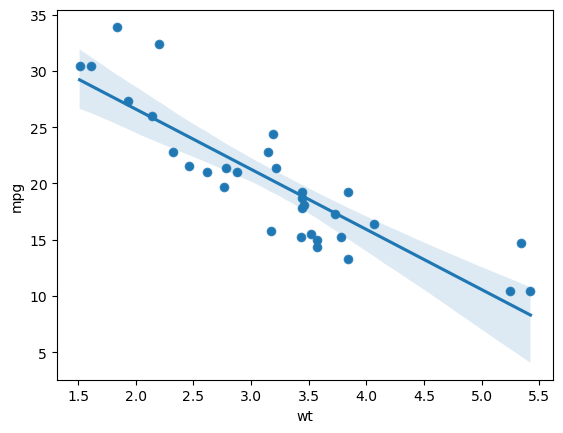

In [9]:
#%% packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
import seaborn as sns
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV
#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

#%% convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

#%% Dataset and Dataloader
class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(dataset = LinearRegressionDataset(X_np, y_np), batch_size=2)


#%%
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
model.train()

# %% Mean Squared Error
loss_fun = nn.MSELoss()

#%% Optimizer
learning_rate = 0.02
# test different values of too large 0.1 and too small 0.001
# best 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


#%%
net = NeuralNetRegressor(
    LinearRegressionTorch,
    max_epochs=10,
    lr=0.1,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.set_params(train_split=False, verbose=0)
params = {
    'lr': [0.02, 0.05, 0.08],
    'max_epochs': [10, 200, 500],
}
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='r2', verbose=2)

gs.fit(X, y_true)
print(f"best score: {gs.best_score_:.3f}, best params: {gs.best_params_}")


# %%

## Classification model from scratch - Multi-label/Multi-class

Epoch 0, Loss: 0.5538786053657532
Epoch 10, Loss: 0.535671591758728
Epoch 20, Loss: 0.5695081353187561
Epoch 30, Loss: 0.5511115789413452
Epoch 40, Loss: 0.5160750150680542
Epoch 50, Loss: 0.5682973265647888
Epoch 60, Loss: 0.5442403554916382
Epoch 70, Loss: 0.5186948180198669
Epoch 80, Loss: 0.565211296081543
Epoch 90, Loss: 0.5492105484008789
Naive classifier: 26.55%
Test accuracy: 72.55%


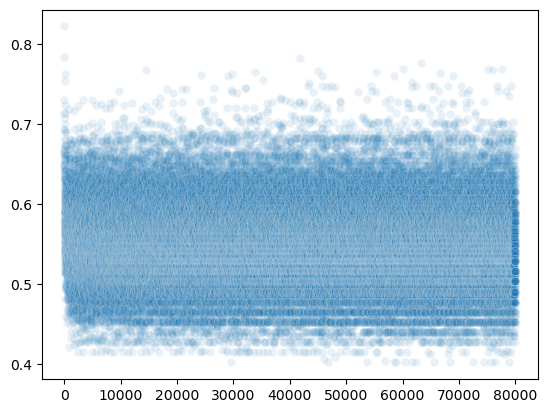

In [18]:
#%% packages
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
import seaborn as sns
import numpy as np
from collections import Counter
# %% data prep
X, y = make_multilabel_classification(n_samples=10000, n_features=10, n_classes=3, n_labels=2)
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y)

# %% train test split
X_train, X_test, y_train, y_test = train_test_split(X_torch, y_torch, test_size = 0.2)


# %% dataset and dataloader
class MultilabelDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

multilabel_data = MultilabelDataset(X_train, y_train)
train_loader = DataLoader(dataset = multilabel_data, batch_size=10)


# %% model
# topology: fc1, relu, fc2
# final activation function??
class MultilabelNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultilabelNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

input_dim = X_torch.shape[1]
output_dim = y_torch.shape[1]
model = MultilabelNetwork(input_size=input_dim, hidden_size=20, output_size=output_dim)
model.train()
# %%
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
losses = []
slope, bias = [], []
number_epochs = 100
for epoch in range(number_epochs):
    for j, data in enumerate(train_loader):
        
        # optimization
        optimizer.zero_grad()

        # forward pass
        y_hat = model(data[0])

        # compute loss
        loss = loss_fn(y_hat, data[1])
        losses.append(loss.item())

        # backprop
        loss.backward()

        # update weights
        optimizer.step()
    
    if (epoch % 10 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

# %% losses
sns.scatterplot(x=range(len(losses)), y=losses, alpha=0.1)

# %% test the model
X_test_torch = torch.FloatTensor(X_test)
with torch.no_grad():
    y_test_hat = model(X_test_torch).round()
    

#%% Naive classifier accuracy
# convert [1, 1, 0] to string '[1. 1. 0.]'
y_test_str = [str(i) for i in y_test.detach().numpy()]
y_test_str

most_common_cnt = Counter(y_test_str).most_common()[0][1]
print(f"Naive classifier: {most_common_cnt/len(y_test_str) * 100}%")

# %% Test accuracy
test_acc = accuracy_score(y_test, y_test_hat)
print(f"Test accuracy: {test_acc * 100}%")

## CNN image classification - multi

In [13]:
import os
print(os.getcwd())

C:\Users\Roland


In [14]:
#%% packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
os.getcwd()

# %% transform and load data
transform = transforms.Compose(
    [transforms.Resize((50,50)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))])

batch_size = 4
trainset = torchvision.datasets.ImageFolder(root='train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.ImageFolder(root='test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

# %%
CLASSES = ['affenpinscher', 'akita', 'corgi']
NUM_CLASSES = len(CLASSES)
class ImageMulticlassClassificationNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)  
        self.pool = nn.MaxPool2d(2, 2)  
        self.conv2 = nn.Conv2d(6, 16, 3) 
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 11 * 11, 128) # out: (BS, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, NUM_CLASSES)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax()
    
    def forward(self, x):
        x = self.conv1(x) # out: (BS, 6, 48, 48)
        x = self.relu(x)
        x = self.pool(x) # out: (BS, 6, 24, 24)
        x = self.conv2(x) # out: (BS, 16, 22, 22)
        x = self.relu(x)
        x = self.pool(x) # out: (BS, 16, 11, 11)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# input = torch.rand(1, 1, 50, 50) # BS, C, H, W
model = ImageMulticlassClassificationNet()      
# model(input).shape

# %% 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
# %% training
NUM_EPOCHS = 10
for epoch in range(NUM_EPOCHS):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch}/{NUM_EPOCHS}, Loss: {loss.item():.4f}')


# %% test
y_test = []
y_test_hat = []
for i, data in enumerate(testloader, 0):
    inputs, y_test_temp = data
    with torch.no_grad():
        y_test_hat_temp = model(inputs).round()
    
    y_test.extend(y_test_temp.numpy())
    y_test_hat.extend(y_test_hat_temp.numpy())

# %%
acc = accuracy_score(y_test, np.argmax(y_test_hat, axis=1))
print(f'Accuracy: {acc*100:.2f} %')
# %% confusion matrix
confusion_matrix(y_test, np.argmax(y_test_hat, axis=1))
# %%

C:\Users\Roland\AppData\Local\Temp\ipykernel_22776\524115499.py:55: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Epoch 0/10, Loss: 1.2974
Epoch 1/10, Loss: 0.5231
Epoch 2/10, Loss: 0.4439
Epoch 3/10, Loss: 0.3321
Epoch 4/10, Loss: 0.1672
Epoch 5/10, Loss: 0.0058
Epoch 6/10, Loss: 0.0350
Epoch 7/10, Loss: 0.0220
Epoch 8/10, Loss: 0.0034
Epoch 9/10, Loss: 0.0013
Accuracy: 96.67 %


array([[20,  0,  0],
       [ 0, 20,  0],
       [ 2,  0, 18]], dtype=int64)

## RNN - Tensor flow

In [21]:
!pip install tensorflow
import numpy as np
import tensorflow as tf

# Generate dummy data
timesteps = 100
input_features = 1
output_features = 1
x = np.random.rand(1000, timesteps, input_features)
y = np.random.rand(1000, output_features)

# Split the data into training and test sets
train_x, test_x = x[:900], x[900:]
train_y, test_y = y[:900], y[900:]

# Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(32, input_shape=(timesteps, input_features)))
model.add(tf.keras.layers.Dense(output_features))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))

# Evaluate the model on the test set
test_loss = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", test_loss)


     ------------------------------------ 266.3/266.3 MB 195.8 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 443.7 kB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 598.9 kB/s eta 0:00:00
     -------------------------------------- 23.2/23.2 MB 928.5 kB/s eta 0:00:00
     ------------------------------------ 895.9/895.9 kB 396.4 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 507.9 kB/s eta 0:00:00
     ------------------------------------ 439.2/439.2 kB 429.0 kB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 475.6 kB/s eta 0:00:00
     ------------------------------------ 126.5/126.5 kB 275.6 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 393.6 kB/s eta 0:00:00
     ------------------------------------ 177.8/177.8 kB 564.2 kB/s eta 0:00:00
     -----------------------------------

29/29 [==============================] - 0s 8ms/step - loss: 0.0822 - val_loss: 0.0879
Epoch 10/10
29/29 [==============================] - 0s 8ms/step - loss: 0.0827 - val_loss: 0.0888
Test loss: 0.08884008228778839


## RNN - Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Dummy online dataset
sequence_length = 10
input_dim = 5
hidden_size = 128
batch_size = 64
num_classes = 2

x = np.random.randn(batch_size, sequence_length, input_dim)
y = np.random.randint(num_classes, size=(batch_size, 1))

# Converting data to tensors
x = torch.tensor(x).float()
y = torch.tensor(y).long()

# Defining the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Initializing the model, loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNN(input_dim, hidden_size, 1, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    outputs = model(x)
    loss = criterion(outputs, y.squeeze())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing loop
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(x)
    _, predicted = torch.max(outputs.data, 1)
    total += y.size(0)
    correct += (predicted == y.squeeze()).sum().item()
    print(f'Accuracy of the model on the test data: {100 * correct / total}')


## LSTM

Epoch: 0, Loss: 3.185800313949585


<AxesSubplot:>

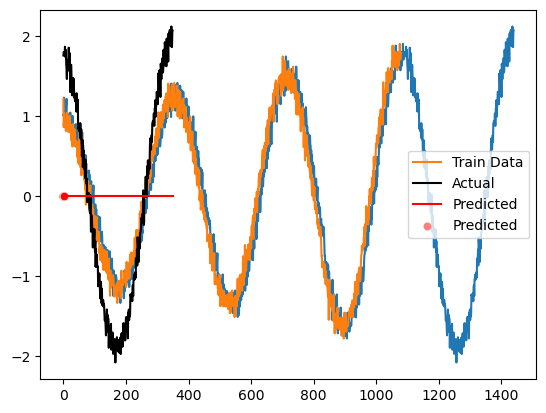

In [17]:
#%% Packages
import numpy as np 
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
# %% simple dataset
num_points = 360*4
X = np.arange(num_points)
y = [np.cos(X[i]*np.pi/180) * (1+i/num_points) + (np.random.randn(1)*0.1)[0] for i in range(len(X))]
sns.lineplot(x=X, y=y)
# %% Data Restructuring
X_restruct = [] 
y_restruct = [] 

for i in range(num_points-10):
     list1 = []
     for j in range(i,i+10):
         list1.append(y[j])
     X_restruct.append(list1)
     y_restruct.append(y[j+1])
X_restruct = np.array(X_restruct)
y_restruct = np.array(y_restruct)
# %% Train / Test Split
train_test_clipping = 360*3
X_train = X_restruct[:train_test_clipping]
X_test = X_restruct[train_test_clipping:]
y_train = y_restruct[:train_test_clipping]
y_test = y_restruct[train_test_clipping:]


#%% Create Dataset and Dataloader
# Dataset 
class TrigonometricDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Dataloader
train_loader = DataLoader(TrigonometricDataset(X_train, y_train), batch_size=2)
test_loader = DataLoader(TrigonometricDataset(X_test, y_test), batch_size=len(y_test))
#%% visualize train data
sns.lineplot(x=range(len(y_train)), y=y_train, label = 'Train Data')

# %% Model
class TrigonometryModel(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(TrigonometryModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size=5, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(in_features=5, out_features=output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x, status = self.lstm(x)    
        x = x[:, -1, :]  # reshape for fc layer; out: BS, hidden
        x = self.fc1(x)
        x = self.relu(x)

        return x

#%% instantiate model, optimizer, and loss
model = TrigonometryModel()
# input = torch.rand((2, 10, 1))  # BS, seq_len, input_size
# model(input).shape  # out: [BS, seq_len, hidden]


#%% Loss and Optimizer
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
NUM_EPOCHS = 20

#%% Train
for epoch in range(NUM_EPOCHS):
    for j, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X.view(-1, 10, 1))
        loss = loss_fun(y_pred, y.unsqueeze(1))
        loss.backward()
        optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.data}")
  

# %% Create Predictions
test_set = TrigonometricDataset(X_test, y_test)
X_test_torch, y_test_torch = next(iter(test_loader))
with torch.no_grad():
    y_pred = model(torch.unsqueeze(X_test_torch, 2)).detach().squeeze().numpy()
y_act = y_test_torch.numpy()
x_act = range(y_act.shape[0])
sns.lineplot(x=x_act, y=y_act, label = 'Actual',color='black')
sns.lineplot(x=x_act, y=y_pred, label = 'Predicted',color='red')

# %% correlation plot
sns.scatterplot(x=y_act, y=y_pred, label = 'Predicted',color='red', alpha=0.5)
# %%

## GAN

Text(10, 15, 'Epoch 1')

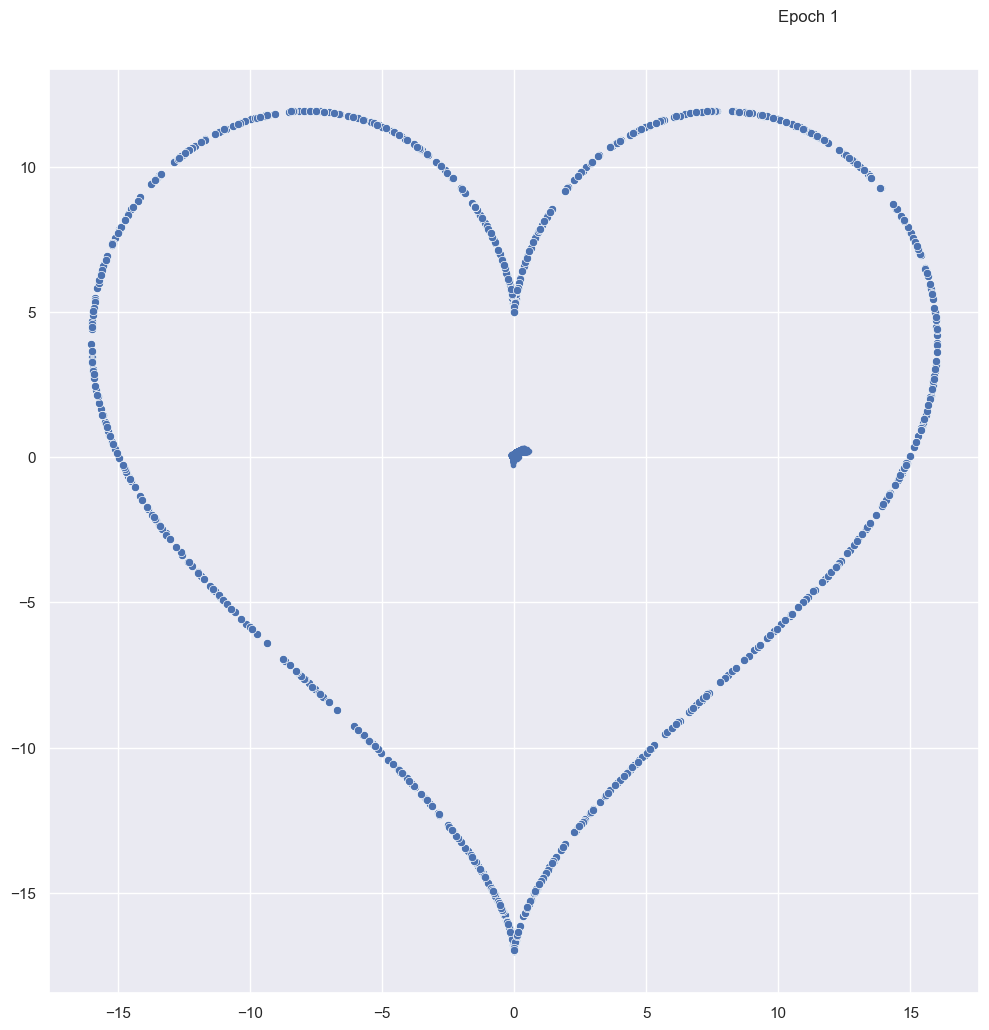

In [19]:
#%% packages
import torch
from torch.utils.data import DataLoader
from torch import nn

import math
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
#%% create training data
TRAIN_DATA_COUNT = 1024
theta = np.array([uniform(0, 2 * np.pi) for _ in range(TRAIN_DATA_COUNT)]) # np.linspace(0, 2 * np.pi, 100)
# Generating x and y data
x = 16 * ( np.sin(theta) ** 3 )
y = 13 * np.cos(theta) - 5 * np.cos(2*theta) - 2 * np.cos(3*theta) - np.cos(4*theta)
sns.scatterplot(x=x, y=y)

#%% prepare tensors and dataloader
train_data = torch.Tensor(np.stack((x, y), axis=1))

train_labels = torch.zeros(TRAIN_DATA_COUNT)
train_set = [
    (train_data[i], train_labels[i]) for i in range(TRAIN_DATA_COUNT)
]

#  dataloader
BATCH_SIZE = 64
train_loader = DataLoader(
    train_set, batch_size=BATCH_SIZE, shuffle=True
)
#%% initialize discriminator and generator
discriminator = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

generator = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

# %% training
LR = 0.001
NUM_EPOCHS = 2
loss_function = nn.BCELoss()
optimizer_discriminator = torch.optim.Adam(discriminator.parameters())
optimizer_generator = torch.optim.Adam(generator.parameters())

for epoch in range(NUM_EPOCHS):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((BATCH_SIZE, 1))
        latent_space_samples = torch.randn((BATCH_SIZE, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((BATCH_SIZE, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        if epoch % 2 == 0:
            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(
                output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

        if epoch % 2 == 1:
            # Data for training the generator
            latent_space_samples = torch.randn((BATCH_SIZE, 2))

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(
                output_discriminator_generated, real_samples_labels
            )
            loss_generator.backward()
            optimizer_generator.step()
    
            # Show progress
            if epoch % 10 == 0:
                print(epoch)
                print(f"Epoch {epoch}, Discriminator Loss {loss_discriminator}")
                print(f"Epoch {epoch}, Generator Loss {loss_generator}")
                with torch.no_grad():
                    latent_space_samples = torch.randn(1000, 2)
                    generated_samples = generator(latent_space_samples).detach()
                plt.figure()
                plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
                plt.xlim((-20, 20))
                plt.ylim((-20, 15))
                plt.text(10, 15, f"Epoch {epoch}")
                plt.savefig(f"train_progress/image{str(epoch).zfill(3)}.jpg")


    

# %% check the result
latent_space_samples = torch.randn(10000, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
plt.text(10, 15, f"Epoch {epoch}")

# %%

## Autoencoders

In [26]:
#%% packages
from typing import OrderedDict
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils 

#%% Dataset and data loader
path_images = 'autoencoders-data/train'

transform = transforms.Compose(
    [transforms.Resize((64,64)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))])

dataset = ImageFolder(root=path_images, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
# %% model class
LATENT_DIMS = 128
class Encoder(nn.Module):
    def __init__(self) -> None:
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 6, 3)  # out: 6, 62, 62
        self.conv2 = nn.Conv2d(6, 16, 3) # out: 16, 60, 60
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten() # out: 16*60*60 = 57600
        self.fc = nn.Linear(16*60*60, LATENT_DIMS)

    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

class Decoder(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.fc = nn.Linear(LATENT_DIMS, 16*60*60)
        self.conv2 = nn.ConvTranspose2d(16, 6, 3)
        self.conv1 = nn.ConvTranspose2d(6, 1, 3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 16, 60, 60)  # infer first dim from other dims
        x = self.conv2(x)
        x = self.relu(x)
        x = self.conv1(x)
        x = self.relu(x)
        return x

class Autoencoder(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Test it
input = torch.rand((1, 1, 64, 64))
model = Autoencoder()
model(input).shape


#%% init model, loss function, optimizer
model = Autoencoder()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

NUM_EPOCHS = 30

for epoch in range(NUM_EPOCHS):
    losses_epoch = []
    for batch_idx, (data, target) in enumerate(dataloader):
        data = data.view(-1, 1, 64, 64)
        output = model(data)

        loss = F.mse_loss(output, data)
        losses_epoch.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch: {epoch} \tLoss: {np.mean(losses_epoch)}")  

# %% visualise original and reconstructed images
def show_image(img):
    img = 0.5 * (img + 1)  # denormalizeA
    # img = img.clamp(0, 1) 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

images, labels = iter(dataloader).next()
print('original')
plt.rcParams["figure.figsize"] = (20,3)
show_image(torchvision.utils.make_grid(images))

# %% latent space
print('latent space')
latent_img = model.encoder(images)
latent_img = latent_img.view(-1, 1, 8, 16)
show_image(torchvision.utils.make_grid(latent_img))
#%%
print('reconstructed')
show_image(torchvision.utils.make_grid(model(images)))


# %% Compression rate
image_size = images.shape[2] * images.shape[3] * 1
compression_rate = (1 - LATENT_DIMS / image_size) * 100
compression_rate

C:\Users\Roland\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 0 	Loss: 0.5427682921290398
Epoch: 1 	Loss: 0.5330634700755278
Epoch: 2 	Loss: 0.5348415300250053
Epoch: 3 	Loss: 0.521539319306612
Epoch: 4 	Loss: 0.5384333990514278
Epoch: 5 	Loss: 0.5304709325234095
Epoch: 6 	Loss: 0.533081037302812
Epoch: 7 	Loss: 0.5177963171154261
Epoch: 8 	Loss: 0.5387817745407423
Epoch: 9 	Loss: 0.5419748226801554
Epoch: 10 	Loss: 0.5277949124574661
Epoch: 11 	Loss: 0.5301663105686506
Epoch: 12 	Loss: 0.5260354715089003
Epoch: 13 	Loss: 0.5362578195830187
Epoch: 14 	Loss: 0.5366984804471334
Epoch: 15 	Loss: 0.533851969987154
Epoch: 16 	Loss: 0.532900333404541
Epoch: 17 	Loss: 0.5398169805606207
Epoch: 18 	Loss: 0.5294877203802267
Epoch: 19 	Loss: 0.5178787795205911
Epoch: 20 	Loss: 0.5407431870698929
Epoch: 21 	Loss: 0.535030223429203
Epoch: 22 	Loss: 0.5198670259366432
Epoch: 23 	Loss: 0.5282359793782234
Epoch: 24 	Loss: 0.5203710446755091
Epoch: 25 	Loss: 0.5280654728412628
Epoch: 26 	Loss: 0.5360593435664972
Epoch: 27 	Loss: 0.5427682908872763
Epoch: 

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

## Transformers

In [25]:
!pip install hugsvision
#%%
# source: https://medium.com/@yanis.labrak/how-to-train-a-custom-vision-transformer-vit-image-classifier-to-help-endoscopists-in-under-5-min-2e7e4110a353
import pandas
#%%
#%% Packages
from hugsvision.dataio.VisionDataset import VisionDataset
from hugsvision.nnet.VisionClassifierTrainer import VisionClassifierTrainer
from transformers import ViTFeatureExtractor, ViTForImageClassification
from hugsvision.inference.VisionClassifierInference import VisionClassifierInference

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#%% data prep
train, val, id2label, label2id = VisionDataset.fromImageFolder(
    "./train/",
    test_ratio   = 0.1,
    balanced     = True,
    augmentation = True, 
    torch_vision = False
)

#%%
huggingface_model = 'google/vit-base-patch16-224-in21k'

trainer = VisionClassifierTrainer(
	model_name   = "MyDogClassifier",
	train        = train,
	test         = val,
	output_dir   = "./out/",
	max_epochs   = 20,
	batch_size   = 4, 
	lr	     = 2e-5,
	fp16	     = True,
	model = ViTForImageClassification.from_pretrained(
	    huggingface_model,
	    num_labels = len(label2id),
	    label2id   = label2id,
	    id2label   = id2label
	),
	feature_extractor = ViTFeatureExtractor.from_pretrained(
		huggingface_model,
	),
)

#%% Model Evaluation
y_true, y_pred = trainer.evaluate_f1_score()

#%%
cm = confusion_matrix(y_true, y_pred)
labels = list(label2id.keys())
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

# plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="")
plt.savefig("./conf_matrix_1.jpg")

# %% Inference
import os.path
path = "./out/MYDOGCLASSIFIER/20_2022-09-09-22-30-04/model/"
img  = "./test/affenpinscher/affenpinscher_0.jpg"

classifier = VisionClassifierInference(
    feature_extractor = ViTFeatureExtractor.from_pretrained(path),
    model = ViTForImageClassification.from_pretrained(path),
)

label = classifier.predict(img_path=img)
print("Predicted class:", label)

# %% Test dataset
test, _, id2label, label2id = VisionDataset.fromImageFolder(
    "./test/",
    test_ratio   = 0,
    balanced     = True,
    augmentation = True, 
    torch_vision = False
)

classifier.predict(img)
# %% 
import glob
test_files = [f for f in glob.glob("./test/**/**", recursive=True) if os.path.isfile(f)]
# %%
for i in range(len(test_files)):
	print(f"{test_files[i]}")
	print(f"predicted: {classifier.predict(test_files[i])}")
# %%

     ------------------------------------ 517.2/517.2 kB 158.3 kB/s eta 0:00:00
     ------------------------------------ 825.8/825.8 kB 165.2 kB/s eta 0:00:00
     ---------------------------------------- 6.3/6.3 MB 200.7 kB/s eta 0:00:00
     ------------------------------------ 549.1/549.1 kB 297.4 kB/s eta 0:00:00
     -------------------------------------- 38.2/38.2 MB 236.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------ 190.3/190.3 kB 311.5 kB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 198.5 kB/s eta 0:00:00
     ------------------------------------ 323.5/323.5 kB 172

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [16 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
  running build_ext
  cythoning pycocotools/_mask.pyx to pycocotools\_mask.c
  C:\Users\Roland\AppData\Local\Temp\pip-build-env-3u87lr2m\overlay\Lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Roland\AppData\Local\Temp\pip-install-u08qx47p\pycocotools_a29e23b2eb2d493e8ddd9ef6b6906382\pycocotools\_mask.p

ModuleNotFoundError: No module named 'hugsvision'

## Compare models

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# Load the Boston Housing Prices dataset
boston_dataset = load_boston()

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['PRICE'] = boston_dataset.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('PRICE', axis=1), df['PRICE'], test_size=0.3)

# Train the Decision Tree model
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

# Predict the housing prices using the Decision Tree model
y_pred_dtree = dtree.predict(X_test)

# Calculate the MSE for the Decision Tree model
mse_dtree = mean_squared_error(y_test, y_pred_dtree)

# Train the Neural Network model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Predict the housing prices using the Neural Network model
y_pred_nn = model.predict(X_test)

# Calculate the MSE for the Neural Network model
mse_nn = mean_squared_error(y_test, y_pred_nn)

# Compare the MSE of both models
print('MSE of Decision Tree:', mse_dtree)
print('MSE of Neural Network:', mse_nn)


C:\Users\Roland\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

5/5 [==============================] - 0s 750us/step
MSE of Decision Tree: 24.37098684210526
MSE of Neural Network: 104.02847538891764
